In [1]:
from metrics.wallet import Analysis, LINE_STYLES, DEFAULT_COLORS

In [2]:
# An optional function to precise if an experiment is a success or not
def is_success(x):
    success_status = {'complete'}
    success_results = {'SAT-VERIFIED', 'UNSAT'}
    success_verifier = {'--', 'UNSAT-VERIFIED'}

    status = x['status'] in success_status
    results = x['result'] in success_results
    verifier = x['verifier result'] in success_verifier
    
    return status and results and verifier

In [3]:
# Build the Analysis
my_analysis = Analysis(input_file='input/sat2019.yml', is_success=is_success)

In [4]:
xpware_map = {
    'CaDiCaL default': r'$\textrm{CaDiCaL}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.2 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.2}^\textrm{default}$',
    'MapleLCMDistChronoBT-DL-v2.1 default': r'$\textrm{MapleLCMDistChronoBT-DL-v2.1}^\textrm{default}$',
    'MapleLCMDiscChronoBT-DL-v3 default': r'$\textrm{MapleLCMDiscChronoBT-DL-v3}^\textrm{default}$',
    'cmsatv56-walksat-chronobt default': r'$\textrm{cmsatv56-walksat-chronobt}^\textrm{default}$',
}

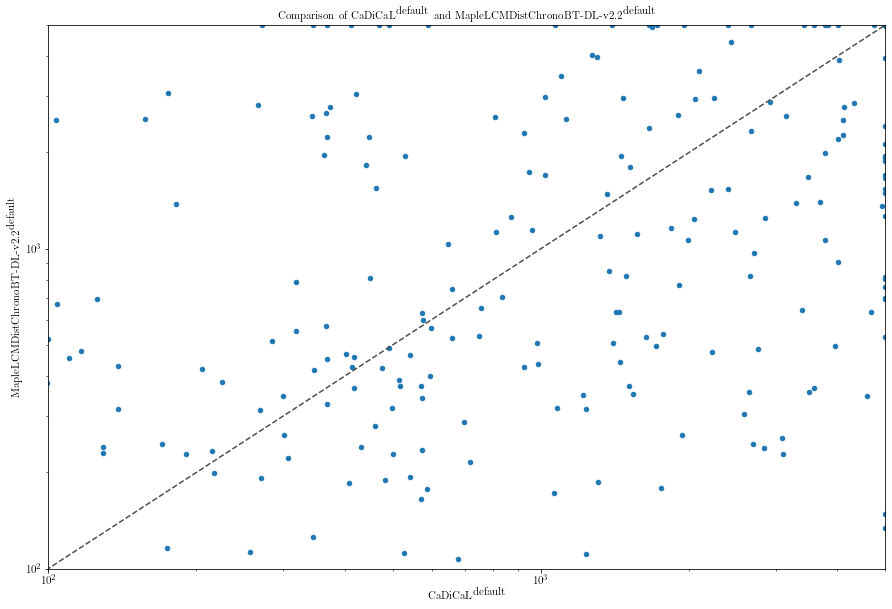

In [5]:
my_analysis.get_scatter_plot(
    xp_ware_x='CaDiCaL default', 
    xp_ware_y='MapleLCMDistChronoBT-DL-v2.2 default', # experimentware names to compare
    scatter_col='cpu_time',                                    # column permitting to draw lines of the scatter
    
    output='output/scatter_zoom.pdf', # output path or None
    figsize=(15,10),                  # size of the figure to output (inch)
    
    xp_ware_name_map=xpware_map, # a map to rename experimentwares
    
    # font properties
    font_name='Times New Roman',
    font_size=11,
    font_color='#000000',
    latex_writing=True, # if True, permits to write in latex mode (make attention to some characters)
    
    logx=True, # log scale to x-axis
    logy=True, # log scale to y-axis
    
    x_min=100,
    y_min=100,
    x_max=-1,
    y_max=-1,
)

In [6]:
# Add a new column

def sat(row):
    sat = None
    success_results = {'SAT-VERIFIED'}
    success_verifier = {'UNSAT-VERIFIED'}

    sat = 'sat' if row['result'] in success_results else sat
    sat = 'unsat' if row['verifier result'] in success_verifier else sat
    
    return sat

my_analysis.map('sat', sat)

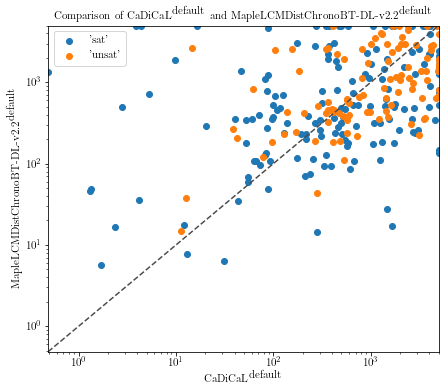

In [7]:
my_analysis.get_scatter_plot(
    xp_ware_x='CaDiCaL default', 
    xp_ware_y='MapleLCMDistChronoBT-DL-v2.2 default',
    scatter_col='cpu_time',
    
    # We precise here the new created column to take into account
    color_col='sat',
    
    output='output/scatter.pdf',
    figsize=(7,6),
    
    xp_ware_name_map=xpware_map,
    
    font_name='DejaVu Sans',
    font_size=11,
    font_color='#000000',
    latex_writing=True,
    
    logx=True,
    logy=True,
    
    x_min=-1,
    y_min=-1,
    x_max=-1,
    y_max=-1,
)